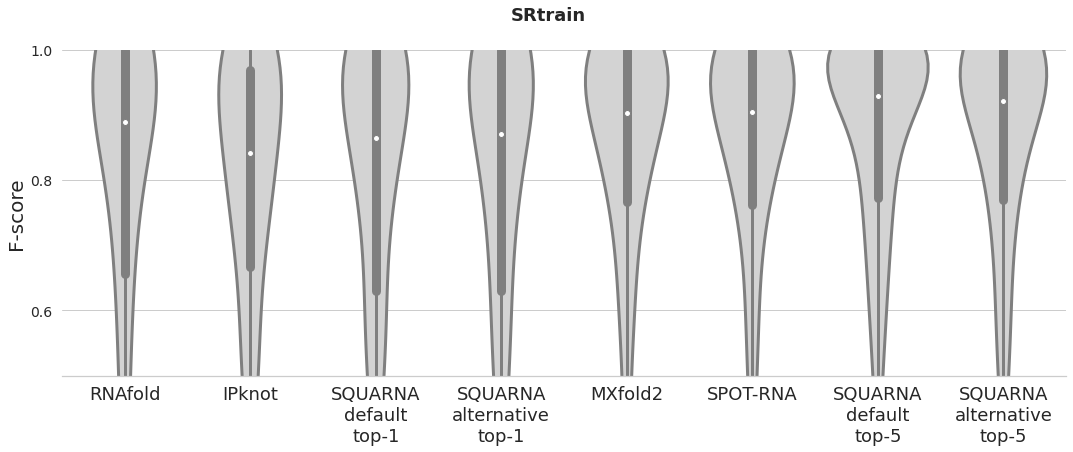

RNAfold RNAfold 1.0
RNAfold IPknot 0.7147486339315736
RNAfold SQUARNA 0.4706220796328947
RNAfold SQUARNAalt 0.7393698478461241
RNAfold MXfold2 0.003239669000687981
RNAfold SPOT-RNA 0.004278709011499459
RNAfold SQUARNA5 4.618423201882646e-06
RNAfold SQUARNAalt5 0.001277165634239691
IPknot RNAfold 0.7147486339315736
IPknot IPknot 1.0
IPknot SQUARNA 0.6987962004664451
IPknot SQUARNAalt 0.9799007228101061
IPknot MXfold2 0.005101720411147414
IPknot SPOT-RNA 0.006841927093003439
IPknot SQUARNA5 3.802114355159609e-06
IPknot SQUARNAalt5 0.001912760060230023
SQUARNA RNAfold 0.4706220796328947
SQUARNA IPknot 0.6987962004664451
SQUARNA SQUARNA 1.0
SQUARNA SQUARNAalt 0.6888021519481453
SQUARNA MXfold2 0.01724424496915953
SQUARNA SPOT-RNA 0.022069174562474474
SQUARNA SQUARNA5 3.0747286718905124e-05
SQUARNA SQUARNAalt5 0.007273086897759755
SQUARNAalt RNAfold 0.7393698478461241
SQUARNAalt IPknot 0.9799007228101061
SQUARNAalt SQUARNA 0.6888021519481453
SQUARNAalt SQUARNAalt 1.0
SQUARNAalt MXfold2 0.00

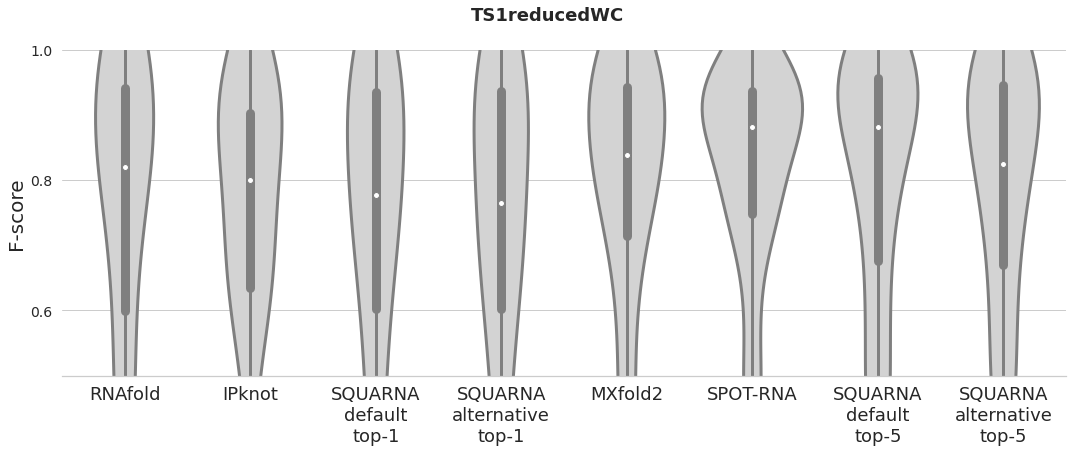

RNAfold RNAfold 1.0
RNAfold IPknot 0.7114118010975453
RNAfold SQUARNA 0.9464550887627303
RNAfold SQUARNAalt 0.8881999083177781
RNAfold MXfold2 0.1335344149726655
RNAfold SPOT-RNA 0.024724878464466225
RNAfold SQUARNA5 0.09675863666008636
RNAfold SQUARNAalt5 0.26251988654274366
IPknot RNAfold 0.7114118010975453
IPknot IPknot 1.0
IPknot SQUARNA 0.6435515130459506
IPknot SQUARNAalt 0.583751662512394
IPknot MXfold2 0.20303102240590437
IPknot SPOT-RNA 0.032095044874973076
IPknot SQUARNA5 0.14524352007872227
IPknot SQUARNAalt5 0.400100202686706
SQUARNA RNAfold 0.9464550887627303
SQUARNA IPknot 0.6435515130459506
SQUARNA SQUARNA 1.0
SQUARNA SQUARNAalt 0.9392703533738906
SQUARNA MXfold2 0.09730284743147469
SQUARNA SPOT-RNA 0.013596133478673483
SQUARNA SQUARNA5 0.06728176650752998
SQUARNA SQUARNAalt5 0.20939640430635714
SQUARNAalt RNAfold 0.8881999083177781
SQUARNAalt IPknot 0.583751662512394
SQUARNAalt SQUARNA 0.9392703533738906
SQUARNAalt SQUARNAalt 1.0
SQUARNAalt MXfold2 0.07872343192225262
S

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

for dataset in ("SRtrain","TS1reducedWC"):
    
    tools = "RNAfold IPknot SQUARNA SQUARNAalt MXfold2 SPOT-RNA SQUARNA5 SQUARNAalt5".split(' ')
    
    labels = ["RNAfold","IPknot", "SQUARNA\ndefault\ntop-1", 
              "SQUARNA\nalternative\ntop-1", 
              "MXfold2", "SPOT-RNA", 
              "SQUARNA\ndefault\ntop-5", 
              "SQUARNA\nalternative\ntop-5", ]
    
    res = {}
    
    for tool in tools:
        
        fscores = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            for line in lines[1:]:
                fscores.append(float(line.strip().split('\t')[fsind]))
            
        res[tool] = fscores
    
    sns.set(style="whitegrid")

    df = pd.DataFrame(res)

    f, ax = plt.subplots(figsize=(18, 6))
    
    ax.set_ylim([0.5,1.0])

    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)

    sns.despine(left=True)

    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.6,0.8,1.0],labels=[0.6,0.8,1.0], size=14)
    
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools:
            statres = stats.ttest_ind(res[tool1], res[tool2])
            print(tool1, tool2,statres.pvalue)


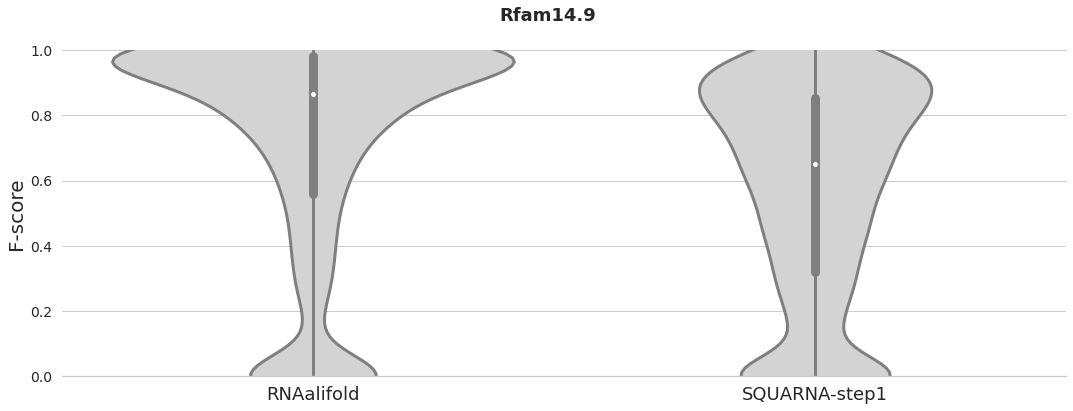

RNAalifold SQUARNAs1 2.275228651583306e-81

RNAalifold DEPTH 0.037 0.016


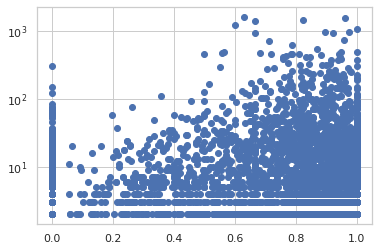

SQUARNAs1 DEPTH 0.148 0.0


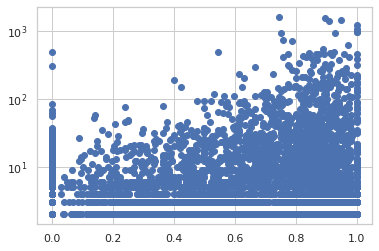

RNAalifold LENGTH -0.049 0.002


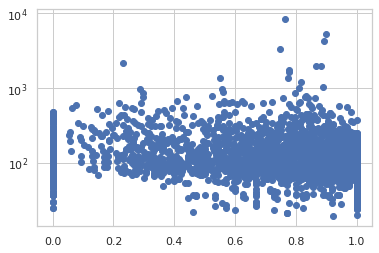

SQUARNAs1 LENGTH -0.045 0.004


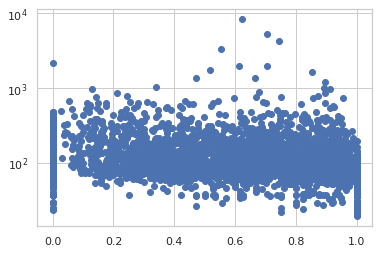

RNAalifold SQUARNAs1 DEPTH -0.132 0.0


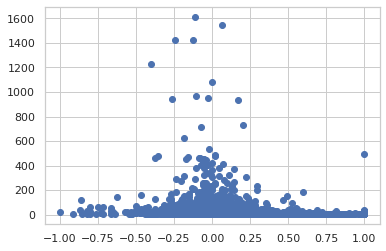

SQUARNAs1 RNAalifold DEPTH 0.132 0.0


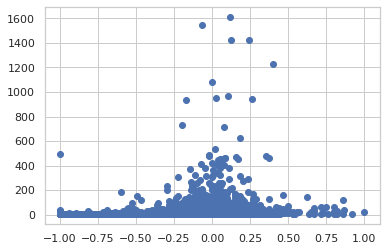

RNAalifold SQUARNAs1 LENGTH -0.008 0.603


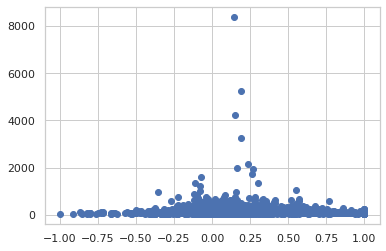

SQUARNAs1 RNAalifold LENGTH 0.008 0.603


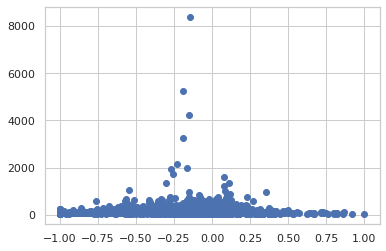

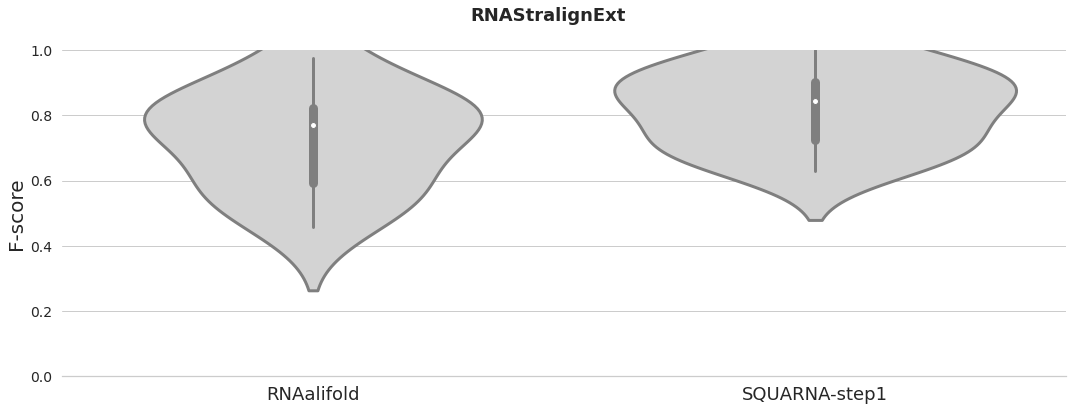

RNAalifold SQUARNAs1 0.11820087618442478

RNAalifold DEPTH 0.083 0.808


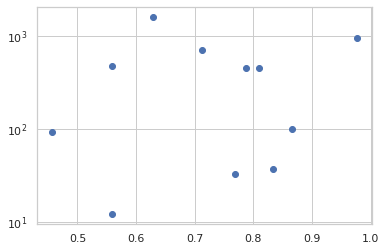

SQUARNAs1 DEPTH 0.229 0.498


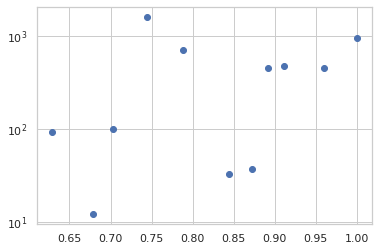

RNAalifold LENGTH 0.106 0.756


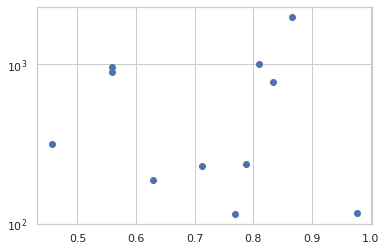

SQUARNAs1 LENGTH -0.265 0.431


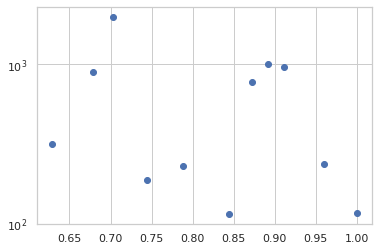

RNAalifold SQUARNAs1 DEPTH -0.118 0.731


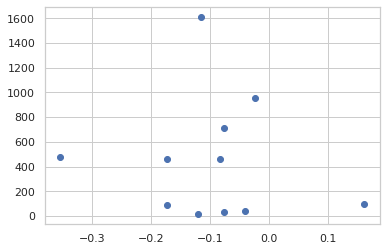

SQUARNAs1 RNAalifold DEPTH 0.118 0.731


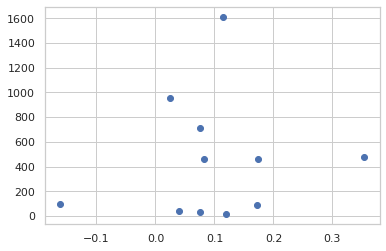

RNAalifold SQUARNAs1 LENGTH 0.39 0.236


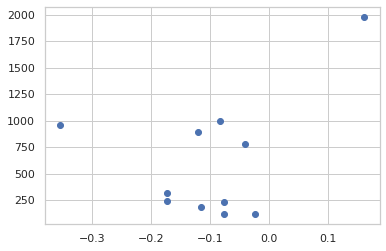

SQUARNAs1 RNAalifold LENGTH -0.39 0.236


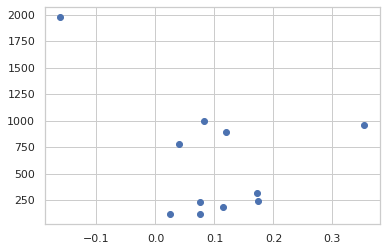

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

for dataset in ("Rfam14.9", "RNAStralignExt"):
    
    tools = "RNAalifold SQUARNAs1 RscapeNested".split(' ')
    
    labels = ["RNAalifold", "SQUARNA-step1",
              "RscapeNested"]
    
    #tools = "RNAalifold IPknot CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2 SQUARNAs3i SQUARNAs3u".split(' ')
    
    #labels = ["RNAalifold","IPknot",
    #          "CentroidAlifold","RscapeNested","RscapeTotal","SQUARNAs1","SQUARNAs2","SQUARNAs3i","SQUARNAs3u"]
    
    res = {}
    resw = {}
    
    for tool in tools:
        
        fscores = []
        depths  = []
        lengths = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            dpind = title.index("DEPTH")
            lnind = title.index("LEN")
            for line in lines[1:]:
                
                depths.append(float(line.strip().split('\t')[dpind]))
                lengths.append(float(line.strip().split('\t')[lnind]))
                fscores.append(float(line.strip().split('\t')[fsind]))
            
        res[tool] = fscores
    
    sns.set(style="whitegrid")

    df = pd.DataFrame(res)

    f, ax = plt.subplots(figsize=(18, 6))
    
    ax.set_ylim([0.0,1.0])

    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)

    sns.despine(left=True)

    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools[tools.index(tool1)+1:]:
            statres = stats.ttest_ind(res[tool1], res[tool2])
            print(tool1, tool2, statres.pvalue)
    print()
            
    for tool in tools: 
        
        plt.scatter(res[tool], depths)
        plt.yscale('log')
        r, p = stats.pearsonr(res[tool], depths)
        print(tool, "DEPTH", round(r,3), round(p,3))
        plt.show()
        
    for tool in tools: 
        plt.scatter(res[tool], lengths)
        plt.yscale('log')
        r, p = stats.pearsonr(res[tool], lengths)
        print(tool, "LENGTH", round(r,3), round(p,3))
        plt.show()
        
    for tool1 in tools:
        for tool2 in tools:
            if tool1 == tool2:
                continue
            diffs = [res[tool1][i]-res[tool2][i] for i in range(len(depths))]
            plt.scatter(diffs, depths)
            r, p = stats.pearsonr(diffs, depths)
            print(tool1, tool2, "DEPTH", round(r,3), round(p,3))
            plt.show()
            
    for tool1 in tools:
        for tool2 in tools:
            if tool1 == tool2:
                continue
            diffs = [res[tool1][i]-res[tool2][i] for i in range(len(lengths))]
            plt.scatter(diffs, lengths)
            r, p = stats.pearsonr(diffs, lengths)
            print(tool1, tool2, "LENGTH", round(r,3), round(p,3))
            plt.show()
